# Churn_Modelling
#### Reference: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset[0:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Preprocessing

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Fitting the classifier to the Training set: Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Making the Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix 
def Classification(clf, X, y):
    X_set, y_set = X, y
    y_hat = clf.predict(X_set)
    y_hat = np.reshape(y_hat, -1)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    cm = confusion_matrix(y_set, y_hat)    
    TN = cm[0, 0]
    FN = cm[1, 0]
    TP = cm[1, 1]
    FP = cm[0, 1]    
    accuracy = (TP + TN)/(TN + FN + TP + FP)
    PPV = TP/(TP + FP) # Positive Predictive Value, Precision 
    TPR = TP/(TP + FN) # Sensitivitive, Recall    
    TNR = TN/(TN + FP) # Specificitive
    NPV = TN/(TN + FP) # Negative Predictive Value    
    F1_score = 2/(1/PPV + 1/TPR)
    summary = {'Accuracy': accuracy, 
               'Positive_Predictive_Value': PPV, 
               'Negative_Predictive_Value': NPV,            
               'Sensitivitive': TPR, 
               'Specificitive': TNR,            
               'F1_score': F1_score, 
               'CM': cm}
    return summary

### Training Set

In [5]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.808625,
 'Positive_Predictive_Value': 0.5863247863247864,
 'Negative_Predictive_Value': 0.9619974874371859,
 'Sensitivitive': 0.21017156862745098,
 'Specificitive': 0.9619974874371859,
 'F1_score': 0.30942715381145697,
 'CM': array([[6126,  242],
        [1289,  343]], dtype=int64)}

### Test Set

In [6]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.811,
 'Positive_Predictive_Value': 0.5818181818181818,
 'Negative_Predictive_Value': 0.9567398119122257,
 'Sensitivitive': 0.23703703703703705,
 'Specificitive': 0.9567398119122257,
 'F1_score': 0.3368421052631579,
 'CM': array([[1526,   69],
        [ 309,   96]], dtype=int64)}

## Using k-fold Cross Validation to evaluate the model's performance

In [7]:
# Applying k-fold Cross Validation
from sklearn.model_selection import cross_val_score
def cv_score(clf, X, y, cv):
    accuracies = cross_val_score(estimator = clf, X = X, y = y, scoring = 'f1', cv = cv)
    plt.plot(accuracies, '-o')
    plt.axhline(accuracies.mean(), color = 'black', ls = '-')
    plt.axhline(accuracies.mean() + 2 * accuracies.std(), color = 'black', ls = '--')
    plt.axhline(accuracies.mean() - 2 * accuracies.std(), color = 'black', ls = '--')
    plt.xlabel('CV')
    plt.ylabel('F1 score')
    plt.title('Classifier: ' + clf.__class__.__name__)
    plt.show()
    return [accuracies.mean(), accuracies.std()]

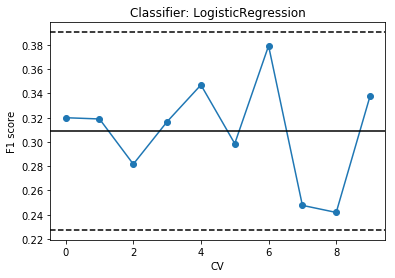

Logistic Regression: CV score = 0.309 (+/- 0.082); Test set accuracy = 0.811


In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs', random_state = 0)
Logistic_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Logistic_score.append(classifier.score(X_test, y_test))
print('Logistic Regression: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Logistic_score[0], 2 * Logistic_score[1], Logistic_score[2]))

## Model Selection
### Tuning the hyper-parameters to raise the performance: L1, L2.

In [9]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(solver = 'liblinear', random_state = 0)
parameter = [{'penalty': ['l1'], 'C': np.arange(0.0001, 1, 0.0001)}, 
             {'penalty': ['l2'], 'C': np.arange(0.0001, 1, 0.0001)}]
grid_search = GridSearchCV(estimator = classifier2, 
                           param_grid = parameter,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
best_parameters

{'C': 0.1449, 'penalty': 'l2'}

## Fitting the classifier to the Training set with best_parameters

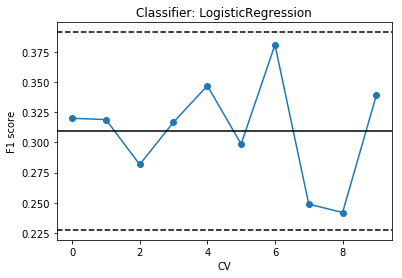

Logistic Regression(L2): CV score = 0.309 (+/- 0.082); Test set accuracy = 0.811


In [20]:
# Applying k-fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 solver = 'liblinear', 
                                 random_state = 0)
Logistic_score2 = cv_score(clf = classifier2, X = X_train, y = y_train, cv = 10)
classifier2.fit(X_train, y_train)
Logistic_score2.append(classifier2.score(X_test, y_test))
print('Logistic Regression(L2): CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Logistic_score2[0], 2 * Logistic_score2[1], Logistic_score2[2]))

best_coef = classifier2.coef_
best_L1_norm = np.abs(best_coef).sum()

### Training Set

In [18]:
Classification(clf = classifier2, X = X_train, y = y_train)

{'Accuracy': 0.808625,
 'Positive_Predictive_Value': 0.5869191049913941,
 'Negative_Predictive_Value': 0.9623115577889447,
 'Sensitivitive': 0.20894607843137256,
 'Specificitive': 0.9623115577889447,
 'F1_score': 0.3081789426118391,
 'CM': array([[6128,  240],
        [1291,  341]], dtype=int64)}

### Test Set

In [19]:
Classification(clf = classifier2, X = X_test, y = y_test)

{'Accuracy': 0.811,
 'Positive_Predictive_Value': 0.5818181818181818,
 'Negative_Predictive_Value': 0.9567398119122257,
 'Sensitivitive': 0.23703703703703705,
 'Specificitive': 0.9567398119122257,
 'F1_score': 0.3368421052631579,
 'CM': array([[1526,   69],
        [ 309,   96]], dtype=int64)}

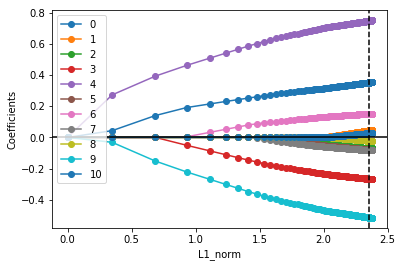

In [21]:
# Plot L1 coefficients
from sklearn.linear_model import LogisticRegression
p = len(X_train[0])
c = np.arange(0.0001, 1, 0.001)
Cost = np.zeros(shape = (len(c), p))
coef = np.zeros(shape = (len(c), p))
L1_norm = np.zeros(shape = (len(c), p))
for ii in range(len(c)):
    classifier = LogisticRegression(penalty = 'l1', 
                                    C = c[ii], 
                                    solver = 'liblinear', 
                                    random_state = 0)
    classifier.fit(X_train, y_train)
    coef[ii, :] = classifier.coef_
    L1_norm[ii, :] = np.full((1, p), np.abs(classifier.coef_).sum()) 
    Cost[ii, :] = np.full((1, p), c[ii])

for i in range(p):
    plt.plot(L1_norm[:, i], coef[:, i], '-o', label = i)
plt.axhline(0, color = 'black')
plt.axvline(best_L1_norm, ls = '--', color = 'black')
plt.xlabel('L1_norm')
plt.ylabel('Coefficients')
plt.legend(loc = 'upper left')
plt.show()

# Conclusion
此二元分類問題採用的是 Logistic Regression 作為分類器，並以 k-fold Cross Validation 來評估模型的表現。以預設參數建模得到的 CV score 為 0.808，Test Set 的預測準確度為0.811，經過超參數調整後，新模型的CV score與預測的準確率有些微提升。

In [14]:
print('Logistic Regression: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Logistic_score[0], 2 * Logistic_score[1], Logistic_score[2]))
print('Logistic Regression(L1): CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Logistic_score2[0], 2 * Logistic_score2[1], Logistic_score2[2]))

Logistic Regression: CV score = 0.309 (+/- 0.082); Test set accuracy = 0.811
Logistic Regression(L1): CV score = 0.309 (+/- 0.082); Test set accuracy = 0.811


## Appendix: Model Interpretation

In [15]:
import statsmodels.api as sm
X_const = sm.add_constant(X_train)
model = sm.Logit(endog = y_train, exog = X_const).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.429005
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Sat, 23 Nov 2019   Pseudo R-squ.:                  0.1520
Time:                        16:59:37   Log-Likelihood:                -3432.0
converged:                       True   LL-Null:                       -4047.2
                                        LLR p-value:                4.787e-257
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6472      0.034    -47.855      0.000      -1.715      -1.580
x1             0.3563      0.033     10.900      0.000       0.292       0.420
x2             0.0484      0.034      1.435      0.151      -0.018       0.115
x3            -0.0724      0.030     -2.390      0.017      -0.132      -0.013
x4            -0.2695      0.030     -8.888      0.000      -0.329      -0.210
x5             0.7526      0.030     25.037      0.000       0.694       0.811
x6            -0.0814      0.030     -2.694      0.007      -0.141      -0.022
x7             0.1537      0.036      4.283      0.000       0.083       0.224
x8            -0.0848      0.031     -2.747      0.006      -0.145      -0.024
x9            -0.0237      0.030     -0.786      0.432      -0.083       0.035
x10           -0.5189      0.032    -16.205      0.000      -0.582      -0.456
x11            0.0292      0.030      0.960      0.337      -0.030       0.089
==============================================================================
"""

#### Baseline: France.
Constant, Germany, Spain, CreditScore, Gender(male: 1, Female: 0), Age, Tenure, Balance, NumberOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
#### Not Significant: 
Spain, HasCrCard, EstimatedSalary

In [16]:
model.pvalues < 0.05

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False])

In [17]:
np.exp(model.params)

array([0.19259316, 1.42798193, 1.049605  , 0.93015824, 0.76374875,
       2.12247368, 0.9217942 , 1.16614227, 0.91870712, 0.97659295,
       0.59520028, 1.02963285])